In [61]:
import os 
import cv2
from PIL import Image
from patchify import patchify
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

<h1>Data Processing <h1>

In [62]:
root_path = '/dataset/'
base_directory = "dataset/"  # Root directory
sub_directories = ["images", "mask"] 
!ls -lah

total 660K
drwxrwxr-x  5 borhan borhan 4.0K Nov  8 11:43 .
drwxrwxr-x  3 borhan borhan 4.0K Nov  6 16:15 ..
-rw-rw-r--  1 borhan borhan 630K Nov 11 12:01 data_procesing.ipynb
drwxrwxr-x 10 borhan borhan 4.0K Nov  6 16:54 dataset
drwxrwxr-x  8 borhan borhan 4.0K Nov  8 14:16 .git
-rw-rw-r--  1 borhan borhan   27 Nov  7 11:04 .gitignore
-rw-rw-r--  1 borhan borhan  685 Nov  7 16:15 requirements.txt
drwxrwxr-x  6 borhan borhan 4.0K Nov  8 11:45 venv


In [63]:
images = []
masks= []


In [64]:

for path, dirs, files in os.walk(base_directory):
    dir_name = path.split(os.path.sep)[-1]
    print(path)
    if dir_name == "images": 
        for image in enumerate(files): 
            images.append(image)
    if dir_name == "masks": 
        for mask in enumerate(files): 
            masks.append(mask)

print(images)
print(masks)

dataset/
dataset/Tile 5
dataset/Tile 5/masks
dataset/Tile 5/images
dataset/Tile 7
dataset/Tile 7/masks
dataset/Tile 7/images
dataset/Tile 3
dataset/Tile 3/masks
dataset/Tile 3/images
dataset/Tile 6
dataset/Tile 6/masks
dataset/Tile 6/images
dataset/Tile 4
dataset/Tile 4/masks
dataset/Tile 4/images
dataset/Tile 8
dataset/Tile 8/masks
dataset/Tile 8/images
dataset/Tile 1
dataset/Tile 1/masks
dataset/Tile 1/images
dataset/Tile 2
dataset/Tile 2/masks
dataset/Tile 2/images
[(0, 'image_part_007.jpg'), (1, 'image_part_003.jpg'), (2, 'image_part_008.jpg'), (3, 'image_part_001.jpg'), (4, 'image_part_009.jpg'), (5, 'image_part_002.jpg'), (6, 'image_part_005.jpg'), (7, 'image_part_006.jpg'), (8, 'image_part_004.jpg'), (0, 'image_part_007.jpg'), (1, 'image_part_003.jpg'), (2, 'image_part_008.jpg'), (3, 'image_part_001.jpg'), (4, 'image_part_009.jpg'), (5, 'image_part_002.jpg'), (6, 'image_part_005.jpg'), (7, 'image_part_006.jpg'), (8, 'image_part_004.jpg'), (0, 'image_part_007.jpg'), (1, 'image_pa

In [65]:
image_patch_size =  256

In [66]:
image = cv2.imread(f'{base_directory}/Tile 2/images/image_part_001.jpg',1)
image.shape

(544, 509, 3)

In [67]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [68]:
min_max_scalar = MinMaxScaler()

In [133]:
#prepare the all images with patch size
image_dataset = []
mask_dataset = []
for image_type in  ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'
    for tile_id in range(1,8):
        for image_id in range(1,20):
            image = cv2.imread(f'{base_directory}Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
            if image is not None: 
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                size_x = (image.shape[1]//image_patch_size)*image_patch_size
                size_y = (image.shape[0]//image_patch_size)*image_patch_size
                # print("{} --- {} -- {}".format(image.shape, size_x, size_y))
                image = Image.fromarray(image)
                image = image.crop((0,0, size_x, size_y))
                # print("{} --- {} ".format(image.size[0], image.size[1]))
                image = np.array(image)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
                # print(len(patched_images))
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if image_type == 'images':
                            individual_patched_image = patched_images[i,j,:,:]
                            #print(individual_patched_image.shape)
                            individual_patched_image = min_max_scalar.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                            individual_patched_image = individual_patched_image[0]
                            #print(individual_patched_image.shape)
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            individual_patched_mask = patched_images[i,j,:,:]
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)
                 

[ WARN:0@4860.866] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4860.866] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4860.866] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4860.866] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0013.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4860.866] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4860.867] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0015.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4860.867] global loadsave.cpp:241 findDecoder imr

In [134]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [135]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

730


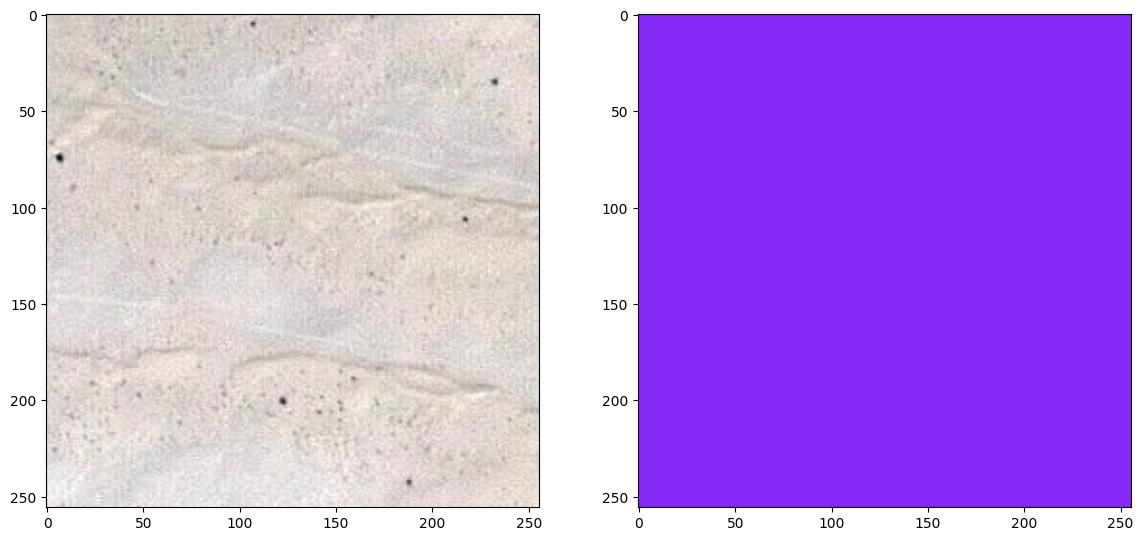

In [136]:
rand_image_id = random.randint(0, len(image_dataset))
print(rand_image_id)
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[rand_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[rand_image_id])

In [137]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building= np.array(tuple(int(class_building[i:i+2], 16) for i in (0, 2, 4)))
print(class_building)


class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land  = np.array(tuple(int(class_land[i:i+2], 16) for i in (0, 2, 4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0, 2, 4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0, 2, 4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0, 2, 4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0, 2, 4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [138]:
label = individual_patched_mask
label

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [172]:
def rgb_to_label(label): 
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    # print(label)
    label_segment[np.all(label == class_water, axis=-1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    # print(label_segment)
    label_segment = label_segment[:,:,0]
    return label_segment 

In [173]:
print(mask_dataset.shape)

(945, 256, 256, 3)


In [174]:
labels = []
for i in range(mask_dataset.shape[0]): 
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [175]:
labels = np.array(labels)
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [176]:
labels = np.expand_dims(labels, axis=3)
labels[5]

array([[[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [177]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

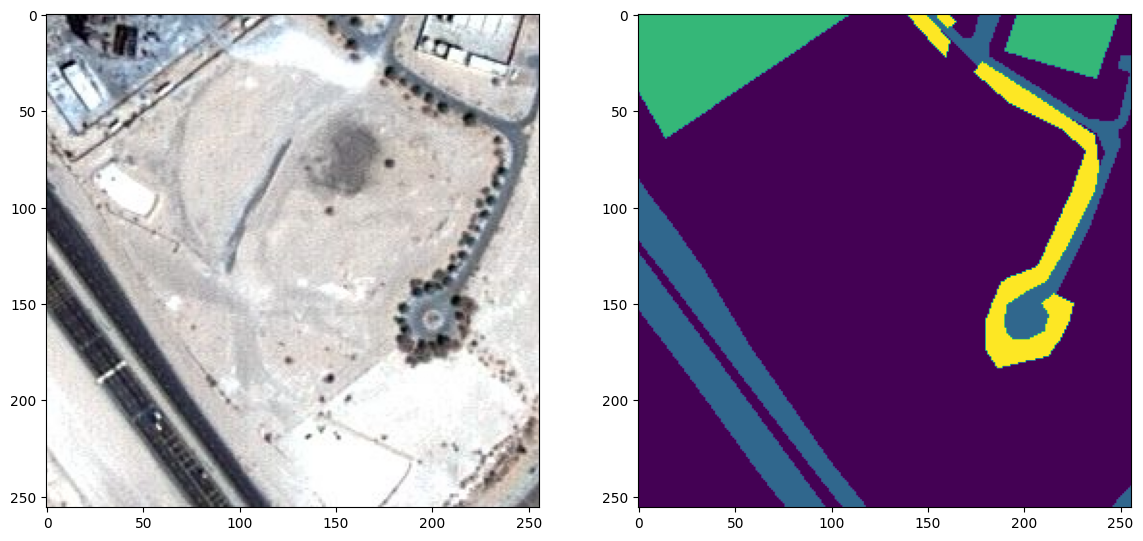

In [178]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [179]:
labels[5][:,:,0]

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [180]:
total_classes = len(np.unique(labels))

In [181]:
total_classes

6

In [182]:
from keras.utils import to_categorical

In [162]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [164]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [159]:
master_training_dataset = image_dataset

In [161]:
from sklearn.model_selection import train_test_split


In [165]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [166]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [167]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [168]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6
